# Median Housing Listing Price vs Median Household Income 2019 - 2021 Final

## Median Housing Listing Price Data 

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import requests
from census import Census
import json
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the data into a Pandas DataFrame
housing_df = pd.read_csv("Resources/Housing_history.csv")
housing_df.head()

,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202307,Rhode Island,RI,550000.0,0.0046,0.1573,1003.0,0.0437,-0.3268,36.0,...,1050556.0,0.0494,0.3553,2615.0,-0.0130,-0.2394,1.6181,-0.1581,0.2947,0.0
1,202307,Michigan,MI,297000.0,-0.0075,0.0425,16106.0,0.0980,-0.2071,36.0,...,424210.0,-0.0087,0.0609,25139.0,0.0677,-0.1976,0.5651,-0.0439,0.0276,0.0
2,202307,Nebraska,NE,359000.0,-0.0296,0.1397,3493.0,0.1009,0.1671,43.0,...,423940.0,-0.0207,0.1038,6562.0,0.0316,-0.0353,0.8932,-0.1087,-0.3978,0.0
3,202307,Idaho,ID,597750.0,-0.0021,0.0489,6847.0,0.0916,-0.1712,46.0,...,891178.0,0.0121,0.0682,10251.0,0.0593,-0.1624,0.5002,-0.0480,0.0173,0.0
4,202307,Arkansas,AR,299900.0,0.0098,0.0905,7509.0,0.0522,0.1505,53.0,...,399636.0,0.0039,0.0652,11899.0,0.0381,0.0431,0.5998,-0.0240,-0.1684,0.0


In [3]:
# Organize the data by dropping columns and renaming the columns
housing_df_organized = housing_df[["state","month_date_yyyymm","median_listing_price"]]
housing2_df = housing_df_organized.rename(columns={"month_date_yyyymm":"Year_Month",
                                                      "state":"State",
                                                      "median_listing_price":"Median Listing Price"})
# Drops any empty rows
housingclean_df = housing2_df.dropna(how='any')
housingclean_df

,State,Year_Month,Median Listing Price
0,Rhode Island,202307,550000.0
1,Michigan,202307,297000.0
2,Nebraska,202307,359000.0
3,Idaho,202307,597750.0
4,Arkansas,202307,299900.0
...,...,...,...
4330,District of Columbia,201607,579900.0
4331,Illinois,201607,224900.0
4332,Maryland,201607,299900.0
4333,Ohio,201607,139900.0


In [4]:
# Get all the data for December 2016 and 2021
housing2019 = housing2_df.loc[housing2_df['Year_Month'] == '201912']
housing2020 = housing2_df.loc[housing2_df['Year_Month'] == '202012']
housing2021 = housing2_df.loc[housing2_df['Year_Month'] == '202112']
new_housing = pd.merge(pd.merge(housing2019, housing2020, on='State'), housing2021, on='State')
new_housing = new_housing.rename(columns={"Year_Month":"Year_Month_2021",
                                          "Year_Month_x":"Year_Month_2019",
                                          "Year_Month_y":"Year_Month_2020",
                                          "Median Listing Price":"Median Listing Price_2021",
                                          "Median Listing Price_x":"Median Listing Price_2019",
                                          "Median Listing Price_y":"Median Listing Price_2020"})
new_housing

,State,Year_Month_2019,Median Listing Price_2019,Year_Month_2020,Median Listing Price_2020,Year_Month_2021,Median Listing Price_2021
0,Pennsylvania,201912,219400.0,202012,259900.0,202112,250000.0
1,Utah,201912,412000.0,202012,531450.0,202112,588225.0
2,New York,201912,462450.0,202012,569000.0,202112,549945.0
3,Colorado,201912,473014.0,202012,510500.0,202112,549500.0
4,West Virginia,201912,161000.0,202012,165000.0,202112,175000.0
5,Florida,201912,329995.0,202012,342250.0,202112,414950.0
6,Wyoming,201912,266500.0,202012,265000.0,202112,325000.0
7,Minnesota,201912,279900.0,202012,299650.0,202112,320000.0
8,Kansas,201912,179950.0,202012,195125.0,202112,212500.0
9,Virginia,201912,316225.0,202012,344995.0,202112,366975.0


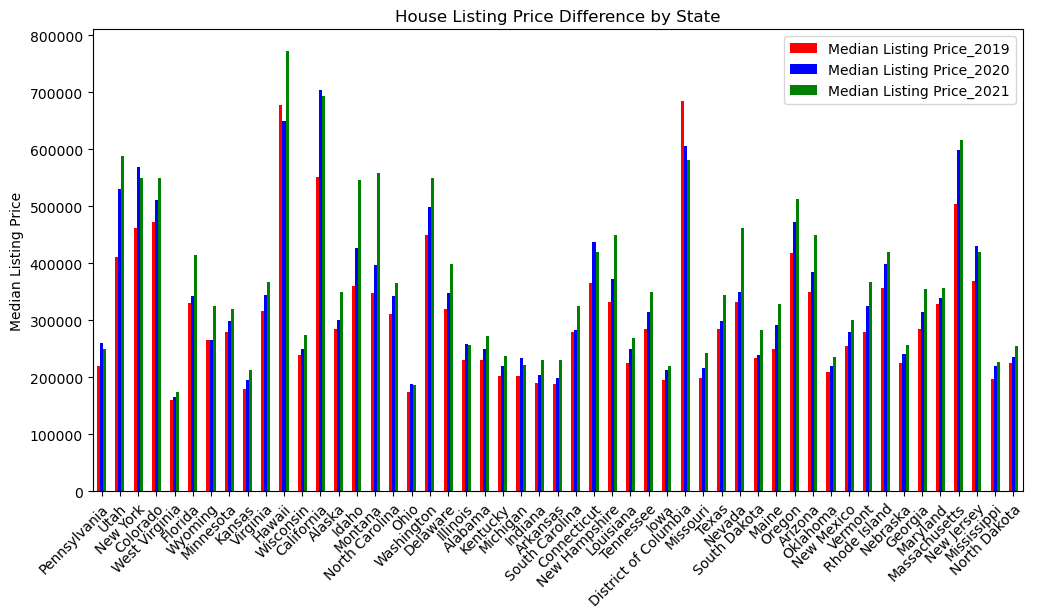

In [5]:
# Bar graph to show the difference in house listing price 
figure1 = new_housing.plot(kind="bar", color=["red", "blue","green"], figsize=(12,6),
                           title="House Listing Price Difference by State",
                           xlabel="State",
                           ylabel="Median Listing Price")

figure1.set_xticklabels(new_housing['State'], rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.savefig("output_data/Fig1.png")
plt.show()

In [6]:

new_housing.to_csv("output_data/Median Listing Prices.csv")

In [7]:
selected_states = ["California", "Texas", "New York", "Florida", "Illinois"]
selected_housing = new_housing[new_housing["State"].isin(selected_states)]
selected_housing

,State,Year_Month_2019,Median Listing Price_2019,Year_Month_2020,Median Listing Price_2020,Year_Month_2021,Median Listing Price_2021
2,New York,201912,462450.0,202012,569000.0,202112,549945.0
5,Florida,201912,329995.0,202012,342250.0,202112,414950.0
12,California,201912,551728.0,202012,704450.0,202112,692928.0
20,Illinois,201912,231450.0,202012,259450.0,202112,257000.0
34,Texas,201912,285000.0,202012,299900.0,202112,345500.0


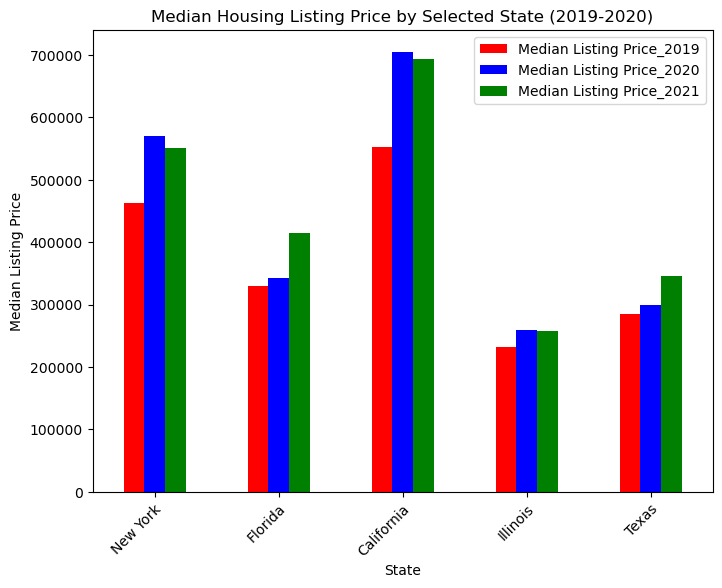

In [8]:
figure2 = selected_housing.plot(kind="bar", color=["red", "blue", "green"], figsize=(8,6),
                           title="Median Housing Listing Price by Selected State (2019-2020)",
                           xlabel="State",
                           ylabel="Median Listing Price")

figure2.set_xticklabels(selected_housing['State'], rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.savefig("output_data/Fig2.png")
plt.show()

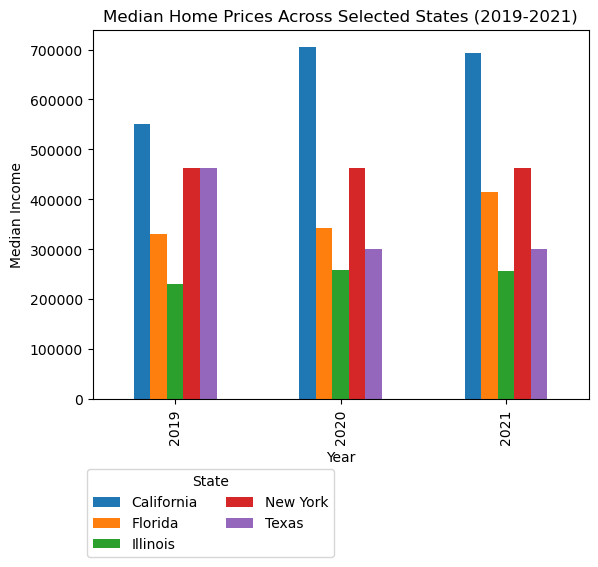

In [9]:
sample_data_home_price = {    'Year': [2019, 2020, 2021],
    'California': [551728, 704450, 692928],
    'Florida': [329995, 342250, 414950],
    'Illinois': [231450, 259450, 257000],
    'New York': [462450, 462450, 462450],
    'Texas': [462450, 299900, 299900]
}

df = pd.DataFrame(sample_data_home_price)

# Set 'Year' column as index 
df.set_index('Year', inplace=True)

# Plot the bar graph
df.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Median Income')
plt.title('Median Home Prices Across Selected States (2019-2021)')
plt.legend(title='State',bbox_to_anchor=(0.5, -0.17), loc='upper right', ncol=2)

# Save the chart as a .fig file
plt.savefig('output_data/bar_chart_123.png')

plt.show()

In [10]:
# List of states you are interested in
states_of_interest = ['California', 'Florida', 'Illinois','New York','Texas']
# Filter the data for the specified states
filtered_data_HP = selected_housing[selected_housing['State'].isin(states_of_interest)].copy()
# Calculate income difference between 2020 and 2019
filtered_data_HP['Home_Price_2019_2020'] = filtered_data_HP['Median Listing Price_2020'] - filtered_data_HP['Median Listing Price_2019']
# Calculate income difference between 2021 and 2020
filtered_data_HP['Home_Price_2020_2021'] = filtered_data_HP['Median Listing Price_2021'] - filtered_data_HP['Median Listing Price_2020']

# Calculate cumulative income increase over the three years
filtered_data_HP['Home_Price_Increase'] = (
    filtered_data_HP['Home_Price_2019_2020'] +
    filtered_data_HP['Home_Price_2020_2021']
)


# Calculate cumulative income increase in percentage
filtered_data_HP.loc[:, 'Cumulative_Income_Increase_Percentage'] = (
    (filtered_data_HP['Home_Price_Increase'] / filtered_data_HP['Median Listing Price_2019']) * 100
)

# Print the updated DataFrame
filtered_data_HP.head()

,State,Year_Month_2019,Median Listing Price_2019,Year_Month_2020,Median Listing Price_2020,Year_Month_2021,Median Listing Price_2021,Home_Price_2019_2020,Home_Price_2020_2021,Home_Price_Increase,Cumulative_Income_Increase_Percentage
2,New York,201912,462450.0,202012,569000.0,202112,549945.0,106550.0,-19055.0,87495.0,18.919883
5,Florida,201912,329995.0,202012,342250.0,202112,414950.0,12255.0,72700.0,84955.0,25.744329
12,California,201912,551728.0,202012,704450.0,202112,692928.0,152722.0,-11522.0,141200.0,25.592321
20,Illinois,201912,231450.0,202012,259450.0,202112,257000.0,28000.0,-2450.0,25550.0,11.039101
34,Texas,201912,285000.0,202012,299900.0,202112,345500.0,14900.0,45600.0,60500.0,21.228070


## Median Household Income 2019 - 2021

In [11]:
# Import U.S. Census API Key
from config import census_key

# Create an instance of the Census library
c = Census(
    census_key,
    year = 2019
)

In [12]:
# Run Census Search to retrieve data on all states (ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19013_001E"),
       
    {'for': 'state:*'}
)

# Convert to DataFrame
Income_Bracket_2019 = pd.DataFrame(census_data)

# Column renaming
Income_Bracket_2019 = Income_Bracket_2019.rename(
    columns = {
        "B19013_001E": "Household Income",
   
        "NAME": "Name"
    }
)


Income_Bracket_2019

,Name,Household Income,state
0,Alabama,50536.0,01
1,Alaska,77640.0,02
2,Arizona,58945.0,04
3,Arkansas,47597.0,05
4,California,75235.0,06
5,Colorado,72331.0,08
6,Delaware,68287.0,10
7,District of Columbia,86420.0,11
8,Connecticut,78444.0,09
9,Florida,55660.0,12


In [13]:
# File to Load
#Income_Bracket_2019_to_load = Path("output_data/Income Bracket 2019 Median Household.csv")
Income_Bracket_2020_to_load = Path("output_data/Income Bracket 2020 Median Household.csv")
Income_Bracket_2021_to_load = Path("output_data/Income Bracket 2021 Median Household.csv")
# Read
#Income_Bracket_2019_data = pd.read_csv(Income_Bracket_2019_to_load)
Income_Bracket_2020_data = pd.read_csv(Income_Bracket_2020_to_load)
Income_Bracket_2021_data = pd.read_csv(Income_Bracket_2021_to_load)

# Combine the income data for years 2019 - 2021 into a single dataset. 
Income_Bracket_complete = pd.merge(pd.merge(Income_Bracket_2020_data, Income_Bracket_2021_data,on="Name"), Income_Bracket_2019,on="Name",how='right') 
Income_Bracket_complete.head()

,Unnamed: 0_x,Name,Household Income_x,state_x,Unnamed: 0_y,Household Income_y,state_y,Household Income,state
0,12,Alabama,52035.0,1,0,54943.0,1,50536.0,01
1,6,Alaska,77790.0,2,1,80287.0,2,77640.0,02
2,16,Arizona,61529.0,4,2,65913.0,4,58945.0,04
3,34,Arkansas,49475.0,5,3,52123.0,5,47597.0,05
4,1,California,78672.0,6,4,84097.0,6,75235.0,06


In [14]:
#Rename columns on new data frame
Income_Bracket_complete = Income_Bracket_complete.rename(columns={'Household Income':'Household Income 2019',
                                                                  'Name':'State Name',
                                                                  'Household Income_x':'Household Income 2020',
                                                                  'Household Income_y':'Household Income 2021',
                                                                  })
Income_Bracket_complete

,Unnamed: 0_x,State Name,Household Income 2020,state_x,Unnamed: 0_y,Household Income 2021,state_y,Household Income 2019,state
0,12,Alabama,52035.0,1,0,54943.0,1,50536.0,01
1,6,Alaska,77790.0,2,1,80287.0,2,77640.0,02
2,16,Arizona,61529.0,4,2,65913.0,4,58945.0,04
3,34,Arkansas,49475.0,5,3,52123.0,5,47597.0,05
4,1,California,78672.0,6,4,84097.0,6,75235.0,06
5,28,Colorado,75231.0,8,5,80184.0,8,72331.0,08
6,47,Delaware,69110.0,10,7,72724.0,10,68287.0,10
7,5,District of Columbia,90842.0,11,8,93547.0,11,86420.0,11
8,20,Connecticut,79855.0,9,6,83572.0,9,78444.0,09
9,7,Florida,57703.0,12,9,61777.0,12,55660.0,12


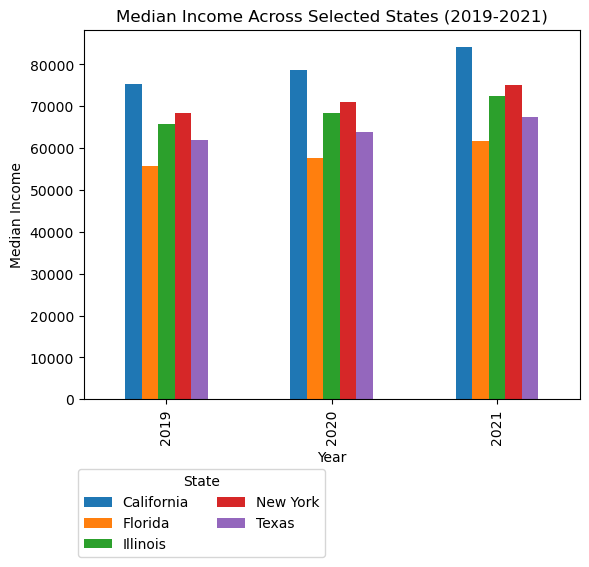

In [15]:
#Create a bar graph displaying Median Household income across 5 stated for the years 2019 - 2021
sample_data = {    'Year': [2019, 2020, 2021],
    'California': [75235, 78672, 84097],
    'Florida': [55660, 57703, 61777],
    'Illinois': [65886, 68428, 72563],
    'New York': [68486, 71117, 75157],
    'Texas': [61874, 63826, 67321]
}

df = pd.DataFrame(sample_data)

# Set 'Year' column as index 
df.set_index('Year', inplace=True)

# Plot the bar graph
df.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Median Income')
plt.title('Median Income Across Selected States (2019-2021)')
plt.legend(title='State',bbox_to_anchor=(0.5, -0.17), loc='upper right', ncol=2)

# Save the chart as a .fig file
plt.savefig('output_data/bar_chart_12.png')

plt.show()


In [16]:
# List of states of interest
states_of_interest = ['California', 'Florida', 'Illinois','New York','Texas']
# Filter the data for the specified states
filtered_data = Income_Bracket_complete[Income_Bracket_complete['State Name'].isin(states_of_interest)].copy()
# Calculate income difference between 2020 and 2019
filtered_data['Income_Increase_2019_2020'] = filtered_data['Household Income 2020'] - filtered_data['Household Income 2019']
# Calculate income difference between 2021 and 2020
filtered_data['Income_Increase_2020_2021'] = filtered_data['Household Income 2021'] - filtered_data['Household Income 2020']

# Calculate cumulative income increase over the three years
filtered_data['Cumulative_Income_Increase'] = (
    filtered_data['Income_Increase_2019_2020'] +
    filtered_data['Income_Increase_2020_2021']
)


# Calculate cumulative income increase in percentage
filtered_data.loc[:, 'Cumulative_Income_Increase_Percentage'] = (
    (filtered_data['Cumulative_Income_Increase'] / filtered_data['Household Income 2019']) * 100
)

# Print the updated DataFrame
filtered_data.head()

,Unnamed: 0_x,State Name,Household Income 2020,state_x,Unnamed: 0_y,Household Income 2021,state_y,Household Income 2019,state,Income_Increase_2019_2020,Income_Increase_2020_2021,Cumulative_Income_Increase,Cumulative_Income_Increase_Percentage
4,1,California,78672.0,6,4,84097.0,6,75235.0,06,3437.0,5425.0,8862.0,11.779092
9,7,Florida,57703.0,12,9,61777.0,12,55660.0,12,2043.0,4074.0,6117.0,10.989939
13,22,Illinois,68428.0,17,13,72563.0,17,65886.0,17,2542.0,4135.0,6677.0,10.134171
32,4,New York,71117.0,36,32,75157.0,36,68486.0,36,2631.0,4040.0,6671.0,9.740677
43,24,Texas,63826.0,48,43,67321.0,48,61874.0,48,1952.0,3495.0,5447.0,8.803375


## Median Household Income by Age

### 2019

In [17]:
# Import U.S. Census API Key
from config import census_key

# Create an instance of the Census library
c = Census(
    census_key,
    year = 2019
)

In [18]:
# Run Census Search to retrieve data on all states (2019 ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19049_001E",
        "B19049_002E",
        "B19049_003E",
        "B19049_004E",
        "B19049_005E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
income_age_2019 = pd.DataFrame(census_data)

# Column renaming
income_age_2019 = income_age_2019.rename(
    columns = {
        "B19049_001E": "Household Income Total",
        "B19049_002E": "Household Income Under 25 years",
        "B19049_003E": "Household Income 25 to 44 years",
        "B19049_004E": "Household Income 45 to 64 years",
        "B19049_005E": "Household Income 65 years and over",
        "NAME": "Name"
    }
)


# Configure the final DataFrame
income_age_2019 = income_age_2019[
    [
        "Name",
        "Household Income Total",
        "Household Income Under 25 years",
        "Household Income 25 to 44 years",
        "Household Income 45 to 64 years",
        "Household Income 65 years and over"
    ]
]

# Rename name to state
income_age_2019 = income_age_2019.rename(columns={"Name":"State"})

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(income_age_2019)}")
income_age_2019

Number of rows in the DataFrame: 52


,State,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
0,Alabama,50536.0,23691.0,54821.0,60250.0,39518.0
1,Alaska,77640.0,44526.0,80407.0,92391.0,61257.0
2,Arizona,58945.0,33202.0,63679.0,70377.0,47442.0
3,Arkansas,47597.0,28951.0,53066.0,55382.0,37101.0
4,California,75235.0,38389.0,80095.0,88861.0,54428.0
5,Colorado,72331.0,38689.0,78228.0,86829.0,52407.0
6,Delaware,68287.0,34216.0,70605.0,82986.0,54346.0
7,District of Columbia,86420.0,39391.0,101513.0,89041.0,56953.0
8,Connecticut,78444.0,39118.0,81064.0,98647.0,55538.0
9,Florida,55660.0,31906.0,60135.0,65374.0,45008.0


In [19]:
# Read in the housing listing prices to compare to income by age
listing_prices = pd.read_csv("output_data/Median Listing Prices.csv")

In [20]:
# Merge 2019 income with house listing prices 
income_age = pd.merge(income_age_2019, listing_prices, on=('State'), how='right')

income_age = income_age[["State",
                         "Year_Month_2019",
                         "Median Listing Price_2019",
                         "Household Income Total",
                         "Household Income Under 25 years",
                         "Household Income 25 to 44 years",
                         "Household Income 45 to 64 years",
                         "Household Income 65 years and over"
                        ]]

# Rename coloums for dataframe
income_age["Median Listing Price_2019"] = income_age["Median Listing Price_2019"].map("${:,.2f}".format)
income_age["Household Income Total"] = income_age["Household Income Total"].map("${:,.2f}".format)
income_age["Household Income Under 25 years"] = income_age["Household Income Under 25 years"].map("${:,.2f}".format)
income_age["Household Income 25 to 44 years"] = income_age["Household Income 25 to 44 years"].map("${:,.2f}".format)
income_age["Household Income 45 to 64 years"] = income_age["Household Income 45 to 64 years"].map("${:,.2f}".format)
income_age["Household Income 65 years and over"] = income_age["Household Income 65 years and over"].map("${:,.2f}".format)

income_age

,State,Year_Month_2019,Median Listing Price_2019,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
0,Pennsylvania,201912,"$219,400.00","$61,744.00","$30,244.00","$70,683.00","$76,132.00","$42,482.00"
1,Utah,201912,"$412,000.00","$71,621.00","$39,030.00","$75,148.00","$89,352.00","$53,720.00"
2,New York,201912,"$462,450.00","$68,486.00","$34,646.00","$77,409.00","$81,723.00","$46,606.00"
3,Colorado,201912,"$473,014.00","$72,331.00","$38,689.00","$78,228.00","$86,829.00","$52,407.00"
4,West Virginia,201912,"$161,000.00","$46,711.00","$25,329.00","$54,660.00","$54,146.00","$37,240.00"
5,Florida,201912,"$329,995.00","$55,660.00","$31,906.00","$60,135.00","$65,374.00","$45,008.00"
6,Wyoming,201912,"$266,500.00","$64,049.00","$31,786.00","$73,705.00","$77,316.00","$45,227.00"
7,Minnesota,201912,"$279,900.00","$71,306.00","$38,836.00","$81,182.00","$86,757.00","$47,971.00"
8,Kansas,201912,"$179,950.00","$59,597.00","$31,637.00","$65,607.00","$73,078.00","$44,416.00"
9,Virginia,201912,"$316,225.00","$74,222.00","$36,933.00","$79,860.00","$90,176.00","$53,323.00"


In [21]:
# Pull out the selected states 
selected_states = ["California", "Texas", "New York", "Florida", "Illinois"]
selected_housing = income_age[income_age["State"].isin(selected_states)]
selected_housing

,State,Year_Month_2019,Median Listing Price_2019,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
2,New York,201912,"$462,450.00","$68,486.00","$34,646.00","$77,409.00","$81,723.00","$46,606.00"
5,Florida,201912,"$329,995.00","$55,660.00","$31,906.00","$60,135.00","$65,374.00","$45,008.00"
12,California,201912,"$551,728.00","$75,235.00","$38,389.00","$80,095.00","$88,861.00","$54,428.00"
20,Illinois,201912,"$231,450.00","$65,886.00","$31,041.00","$72,646.00","$81,223.00","$45,861.00"
34,Texas,201912,"$285,000.00","$61,874.00","$32,170.00","$65,252.00","$74,147.00","$45,521.00"


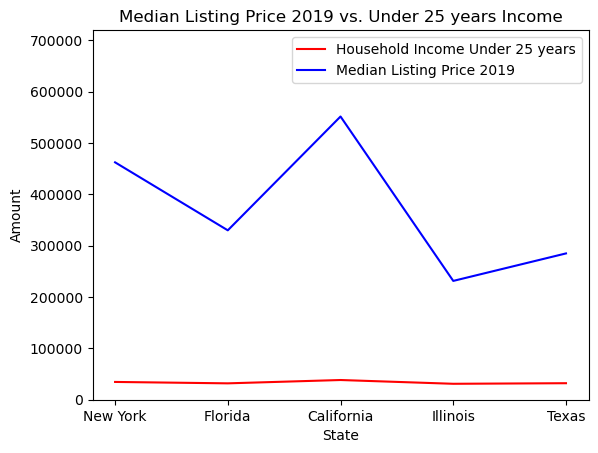

In [22]:
# Plot the difference between house listings and income by age
x_value = selected_housing['State']
selected_housing["Median Listing Price_2019"] = selected_housing["Median Listing Price_2019"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2019']
x_value2 = selected_housing['State']
selected_housing["Household Income Under 25 years"] = selected_housing["Household Income Under 25 years"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['Household Income Under 25 years']
plt.plot(x_value2,y_value2, color="red", label="Household Income Under 25 years")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2019")
plt.title("Median Listing Price 2019 vs. Under 25 years Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig12.png")
plt.show()

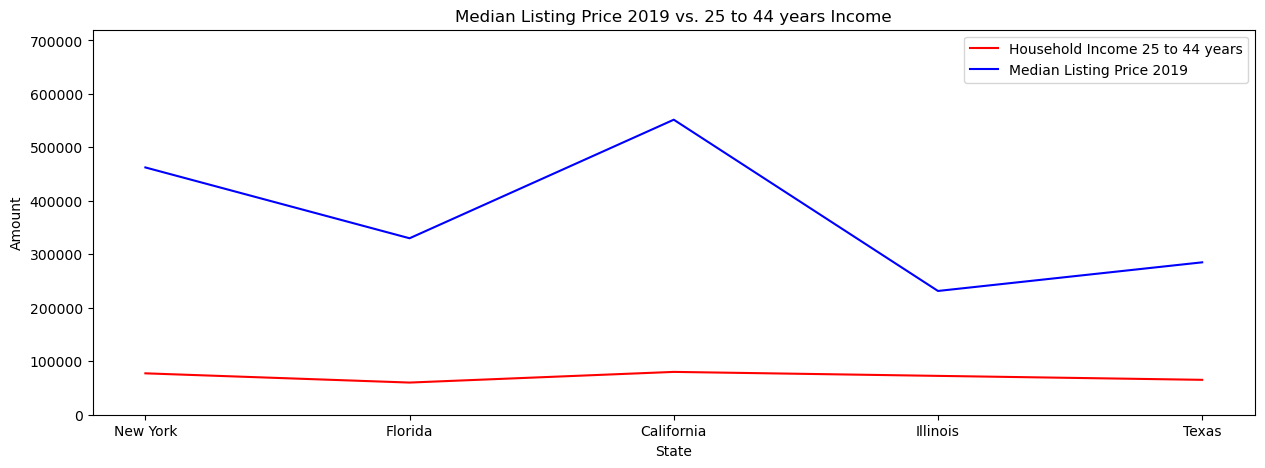

In [23]:
# Plot the difference between house listings and income by age
x_value = selected_housing['State']
selected_housing["Median Listing Price_2019"] = selected_housing["Median Listing Price_2019"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2019']
x_value2 = selected_housing['State']
selected_housing["Household Income 25 to 44 years"] = selected_housing["Household Income 25 to 44 years"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['Household Income 25 to 44 years']
plt.plot(x_value2,y_value2, color="red", label="Household Income 25 to 44 years")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2019")
plt.title("Median Listing Price 2019 vs. 25 to 44 years Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig3.png")
plt.show()

### 2020

In [24]:
# Import U.S. Census API Key
from config import census_key

# Create an instance of the Census library
c = Census(
    census_key,
    year = 2020
)

In [25]:
# Run Census Search to retrieve data on all states (2020 ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19049_001E",
        "B19049_002E",
        "B19049_003E",
        "B19049_004E",
        "B19049_005E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
income_age_2020 = pd.DataFrame(census_data)

# Column renaming
income_age_2020 = income_age_2020.rename(
    columns = {
        "B19049_001E": "Household Income Total",
        "B19049_002E": "Household Income Under 25 years",
        "B19049_003E": "Household Income 25 to 44 years",
        "B19049_004E": "Household Income 45 to 64 years",
        "B19049_005E": "Household Income 65 years and over",
        "NAME": "Name"
    }
)


# Configure the final DataFrame
income_age_2020 = income_age_2020[
    [
        "Name",
        "Household Income Total",
        "Household Income Under 25 years",
        "Household Income 25 to 44 years",
        "Household Income 45 to 64 years",
        "Household Income 65 years and over"
    ]
]

# Rename name to state
income_age_2020 = income_age_2020.rename(columns={"Name":"State"})

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(income_age_2020)}")
income_age_2020

Number of rows in the DataFrame: 52


,State,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
0,Pennsylvania,63627.0,32905.0,73230.0,78215.0,44143.0
1,California,78672.0,41045.0,84076.0,92828.0,57034.0
2,West Virginia,48037.0,26541.0,56539.0,56048.0,38235.0
3,Utah,74197.0,40500.0,78035.0,92923.0,55560.0
4,New York,71117.0,36514.0,81159.0,84446.0,48539.0
5,District of Columbia,90842.0,44256.0,105346.0,99304.0,59428.0
6,Alaska,77790.0,45806.0,82116.0,93859.0,61223.0
7,Florida,57703.0,33820.0,62440.0,68016.0,46182.0
8,South Carolina,54864.0,30987.0,60452.0,64299.0,43822.0
9,North Dakota,65315.0,38725.0,74093.0,81860.0,45849.0


In [26]:
# Read in the housing listing prices to compare to income by age
listing_prices = pd.read_csv("output_data/Median Listing Prices.csv")

In [27]:
# Run Census Search to retrieve data on all states (2020 ACS5 Census)
income_age = pd.merge(income_age_2020, listing_prices, on=('State'), how='right')

income_age = income_age[["State",
                         "Year_Month_2020",
                         "Median Listing Price_2020",
                         "Household Income Total",
                         "Household Income Under 25 years",
                         "Household Income 25 to 44 years",
                         "Household Income 45 to 64 years",
                         "Household Income 65 years and over"
                        ]]

income_age["Median Listing Price_2020"] = income_age["Median Listing Price_2020"].map("${:,.2f}".format)
income_age["Household Income Total"] = income_age["Household Income Total"].map("${:,.2f}".format)
income_age["Household Income Under 25 years"] = income_age["Household Income Under 25 years"].map("${:,.2f}".format)
income_age["Household Income 25 to 44 years"] = income_age["Household Income 25 to 44 years"].map("${:,.2f}".format)
income_age["Household Income 45 to 64 years"] = income_age["Household Income 45 to 64 years"].map("${:,.2f}".format)
income_age["Household Income 65 years and over"] = income_age["Household Income 65 years and over"].map("${:,.2f}".format)

income_age

,State,Year_Month_2020,Median Listing Price_2020,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
0,Pennsylvania,202012,"$259,900.00","$63,627.00","$32,905.00","$73,230.00","$78,215.00","$44,143.00"
1,Utah,202012,"$531,450.00","$74,197.00","$40,500.00","$78,035.00","$92,923.00","$55,560.00"
2,New York,202012,"$569,000.00","$71,117.00","$36,514.00","$81,159.00","$84,446.00","$48,539.00"
3,Colorado,202012,"$510,500.00","$75,231.00","$39,484.00","$81,237.00","$90,347.00","$54,544.00"
4,West Virginia,202012,"$165,000.00","$48,037.00","$26,541.00","$56,539.00","$56,048.00","$38,235.00"
5,Florida,202012,"$342,250.00","$57,703.00","$33,820.00","$62,440.00","$68,016.00","$46,182.00"
6,Wyoming,202012,"$265,000.00","$65,304.00","$31,642.00","$75,858.00","$78,584.00","$47,223.00"
7,Minnesota,202012,"$299,650.00","$73,382.00","$40,813.00","$83,759.00","$90,158.00","$49,601.00"
8,Kansas,202012,"$195,125.00","$61,091.00","$34,184.00","$67,765.00","$74,733.00","$45,777.00"
9,Virginia,202012,"$344,995.00","$76,398.00","$38,463.00","$82,453.00","$93,370.00","$54,826.00"


In [28]:
# Select certain states to pull data from
selected_states = ["California", "Texas", "New York", "Florida", "Illinois"]
selected_housing = income_age[income_age["State"].isin(selected_states)]
selected_housing

,State,Year_Month_2020,Median Listing Price_2020,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
2,New York,202012,"$569,000.00","$71,117.00","$36,514.00","$81,159.00","$84,446.00","$48,539.00"
5,Florida,202012,"$342,250.00","$57,703.00","$33,820.00","$62,440.00","$68,016.00","$46,182.00"
12,California,202012,"$704,450.00","$78,672.00","$41,045.00","$84,076.00","$92,828.00","$57,034.00"
20,Illinois,202012,"$259,450.00","$68,428.00","$32,544.00","$75,867.00","$83,485.00","$48,066.00"
34,Texas,202012,"$299,900.00","$63,826.00","$33,040.00","$67,635.00","$76,623.00","$47,004.00"


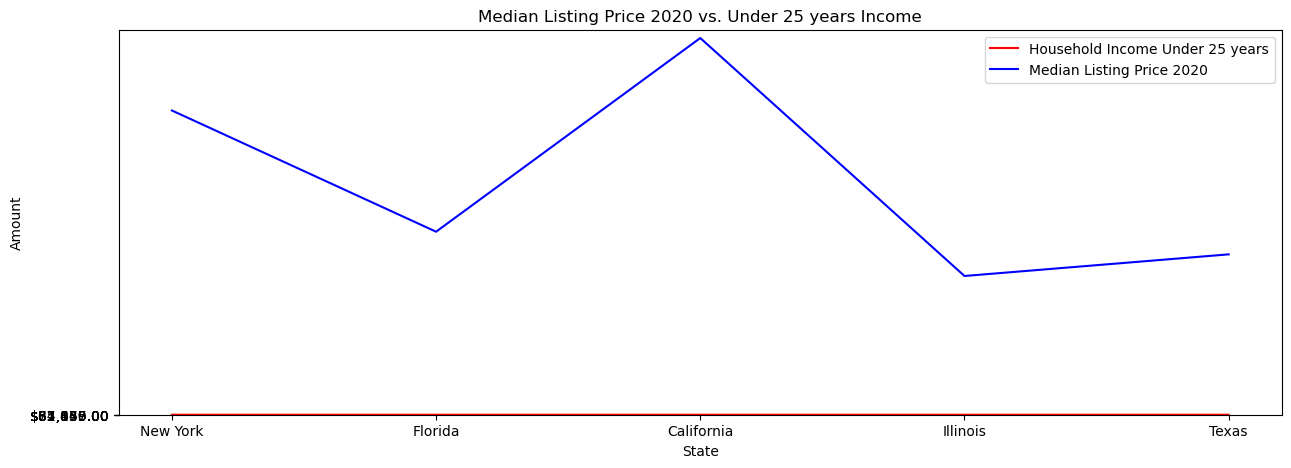

In [29]:
# Plot the difference between house listings and income by age
x_value = selected_housing['State']
selected_housing["Median Listing Price_2020"] = selected_housing["Median Listing Price_2020"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2020']
x_value2 = selected_housing['State']
selected_housing["Household Income Under 25 years"] = selected_housing["Household Income Under 25 years"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['Household Income 25 to 44 years']
plt.plot(x_value2,y_value2, color="red", label="Household Income Under 25 years")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2020")
plt.title("Median Listing Price 2020 vs. Under 25 years Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig13.png")
plt.show()

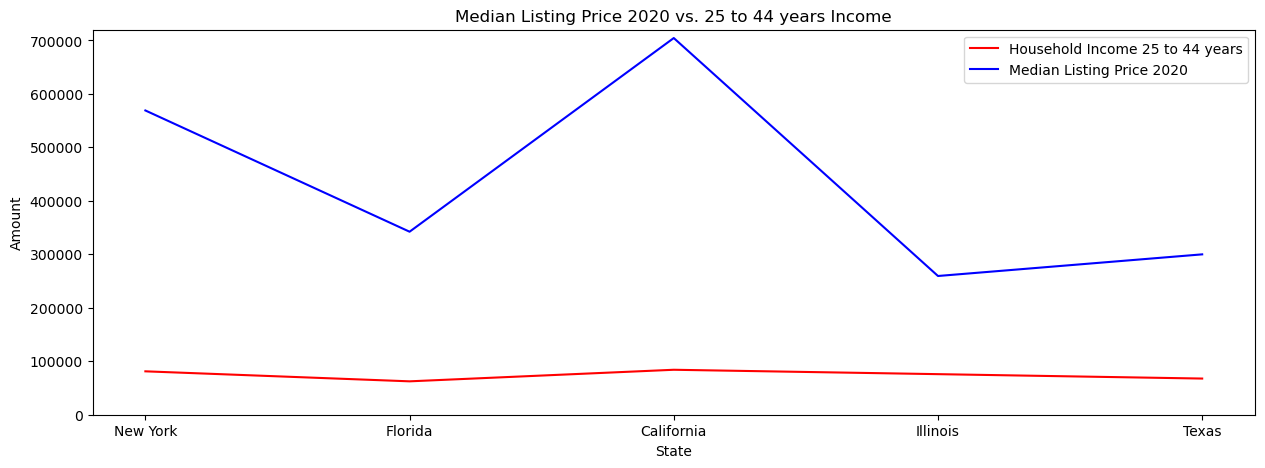

In [30]:
# Plot the difference between house listings and income by age
x_value = selected_housing['State']
selected_housing["Median Listing Price_2020"] = selected_housing["Median Listing Price_2020"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2020']
x_value2 = selected_housing['State']
selected_housing["Household Income 25 to 44 years"] = selected_housing["Household Income 25 to 44 years"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['Household Income 25 to 44 years']
plt.plot(x_value2,y_value2, color="red", label="Household Income 25 to 44 years")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2020")
plt.title("Median Listing Price 2020 vs. 25 to 44 years Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig4.png")
plt.show()

### 2021

In [31]:
# Import U.S. Census API Key
from config import census_key

# Create an instance of the Census library
c = Census(
    census_key,
    year = 2021
)

In [32]:
# Run Census Search to retrieve data on all states (2021 ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19049_001E",
        "B19049_002E",
        "B19049_003E",
        "B19049_004E",
        "B19049_005E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
income_age_2021 = pd.DataFrame(census_data)

# Column renaming
income_age_2021 = income_age_2021.rename(
    columns = {
        "B19049_001E": "Household Income Total",
        "B19049_002E": "Household Income Under 25 years",
        "B19049_003E": "Household Income 25 to 44 years",
        "B19049_004E": "Household Income 45 to 64 years",
        "B19049_005E": "Household Income 65 years and over",
        "NAME": "Name"
    }
)

# Configure the final DataFrame
income_age_2021 = income_age_2021[
    [
        "Name",
        "Household Income Total",
        "Household Income Under 25 years",
        "Household Income 25 to 44 years",
        "Household Income 45 to 64 years",
        "Household Income 65 years and over"
    ]
]
# Rename name to state
income_age_2021 = income_age_2021.rename(columns={"Name":"State"})

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(income_age_2021)}")
income_age_2021

Number of rows in the DataFrame: 52


,State,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
0,Alabama,54943.0,27050.0,59945.0,66253.0,42673.0
1,Alaska,80287.0,44078.0,86218.0,95393.0,62935.0
2,Arizona,65913.0,39880.0,72443.0,79030.0,52250.0
3,Arkansas,52123.0,31919.0,58410.0,60778.0,40259.0
4,California,84097.0,44205.0,90138.0,98785.0,60832.0
5,Colorado,80184.0,43365.0,87239.0,96439.0,58270.0
6,Connecticut,83572.0,42038.0,87411.0,104155.0,60256.0
7,Delaware,72724.0,36302.0,74893.0,86798.0,60631.0
8,District of Columbia,93547.0,46853.0,109135.0,97226.0,64232.0
9,Florida,61777.0,36500.0,66433.0,72740.0,49257.0


In [33]:
# Read in the housing listing prices to compare to income by age
listing_prices = pd.read_csv("output_data/Median Listing Prices.csv")
listing_prices

,Unnamed: 0,State,Year_Month_2019,Median Listing Price_2019,Year_Month_2020,Median Listing Price_2020,Year_Month_2021,Median Listing Price_2021
0,0,Pennsylvania,201912,219400.0,202012,259900.0,202112,250000.0
1,1,Utah,201912,412000.0,202012,531450.0,202112,588225.0
2,2,New York,201912,462450.0,202012,569000.0,202112,549945.0
3,3,Colorado,201912,473014.0,202012,510500.0,202112,549500.0
4,4,West Virginia,201912,161000.0,202012,165000.0,202112,175000.0
5,5,Florida,201912,329995.0,202012,342250.0,202112,414950.0
6,6,Wyoming,201912,266500.0,202012,265000.0,202112,325000.0
7,7,Minnesota,201912,279900.0,202012,299650.0,202112,320000.0
8,8,Kansas,201912,179950.0,202012,195125.0,202112,212500.0
9,9,Virginia,201912,316225.0,202012,344995.0,202112,366975.0


In [34]:
# Run Census Search to retrieve data on all states (2021 ACS5 Census)
income_age = pd.merge(income_age_2021, listing_prices, on=('State'), how='right')

income_age = income_age[["State",
                         "Year_Month_2021",
                         "Median Listing Price_2021",
                         "Household Income Total",
                         "Household Income Under 25 years",
                         "Household Income 25 to 44 years",
                         "Household Income 45 to 64 years",
                         "Household Income 65 years and over"
                        ]]

income_age["Median Listing Price_2021"] = income_age["Median Listing Price_2021"].map("${:,.2f}".format)
income_age["Household Income Total"] = income_age["Household Income Total"].map("${:,.2f}".format)
income_age["Household Income Under 25 years"] = income_age["Household Income Under 25 years"].map("${:,.2f}".format)
income_age["Household Income 25 to 44 years"] = income_age["Household Income 25 to 44 years"].map("${:,.2f}".format)
income_age["Household Income 45 to 64 years"] = income_age["Household Income 45 to 64 years"].map("${:,.2f}".format)
income_age["Household Income 65 years and over"] = income_age["Household Income 65 years and over"].map("${:,.2f}".format)

income_age

,State,Year_Month_2021,Median Listing Price_2021,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
0,Pennsylvania,202112,"$250,000.00","$67,587.00","$35,924.00","$77,704.00","$82,539.00","$47,153.00"
1,Utah,202112,"$588,225.00","$79,133.00","$43,564.00","$83,643.00","$99,306.00","$59,518.00"
2,New York,202112,"$549,945.00","$75,157.00","$39,366.00","$85,570.00","$88,827.00","$51,837.00"
3,Colorado,202112,"$549,500.00","$80,184.00","$43,365.00","$87,239.00","$96,439.00","$58,270.00"
4,West Virginia,202112,"$175,000.00","$50,884.00","$27,814.00","$59,761.00","$59,223.00","$40,256.00"
5,Florida,202112,"$414,950.00","$61,777.00","$36,500.00","$66,433.00","$72,740.00","$49,257.00"
6,Wyoming,202112,"$325,000.00","$68,002.00","$32,895.00","$77,657.00","$81,693.00","$50,854.00"
7,Minnesota,202112,"$320,000.00","$77,706.00","$42,756.00","$88,800.00","$94,880.00","$52,710.00"
8,Kansas,202112,"$212,500.00","$64,521.00","$35,320.00","$71,976.00","$78,885.00","$49,216.00"
9,Virginia,202112,"$366,975.00","$80,615.00","$40,953.00","$86,973.00","$99,057.00","$57,591.00"


In [35]:
# Select certain states to pull data from
selected_states = ["California", "Texas", "New York", "Florida", "Illinois"]
selected_housing = income_age[income_age["State"].isin(selected_states)]
selected_housing

,State,Year_Month_2021,Median Listing Price_2021,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
2,New York,202112,"$549,945.00","$75,157.00","$39,366.00","$85,570.00","$88,827.00","$51,837.00"
5,Florida,202112,"$414,950.00","$61,777.00","$36,500.00","$66,433.00","$72,740.00","$49,257.00"
12,California,202112,"$692,928.00","$84,097.00","$44,205.00","$90,138.00","$98,785.00","$60,832.00"
20,Illinois,202112,"$257,000.00","$72,563.00","$34,424.00","$80,059.00","$87,986.00","$51,237.00"
34,Texas,202112,"$345,500.00","$67,321.00","$35,115.00","$72,082.00","$80,762.00","$49,599.00"


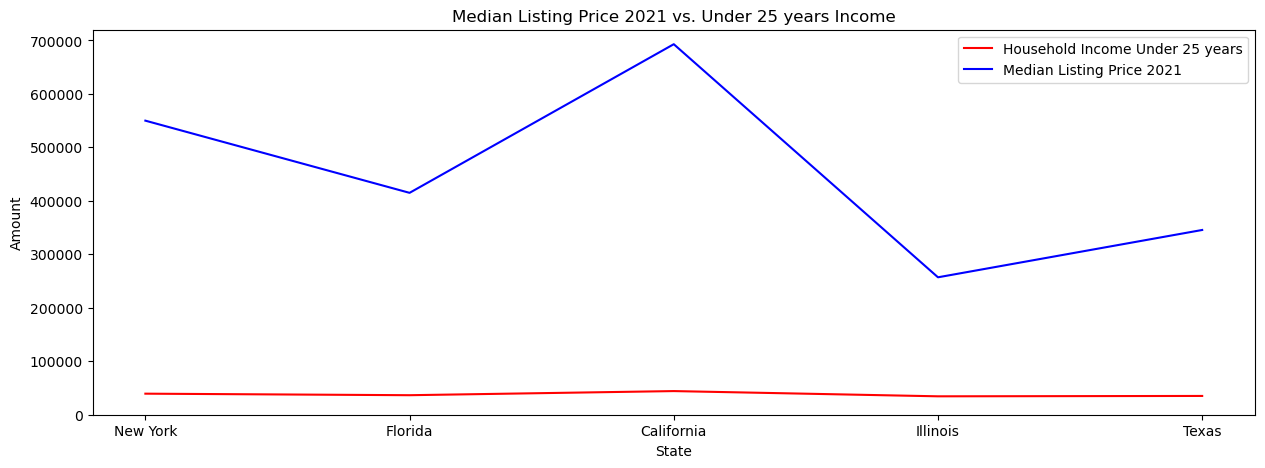

In [36]:
# Plot the difference between house listings and income by age
x_value = selected_housing['State']
selected_housing["Median Listing Price_2021"] = selected_housing["Median Listing Price_2021"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2021']
x_value2 = selected_housing['State']
selected_housing["Household Income Under 25 years"] = selected_housing["Household Income Under 25 years"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['Household Income Under 25 years']
plt.plot(x_value2,y_value2, color="red", label="Household Income Under 25 years")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2021")
plt.title("Median Listing Price 2021 vs. Under 25 years Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig14.png")
plt.show()

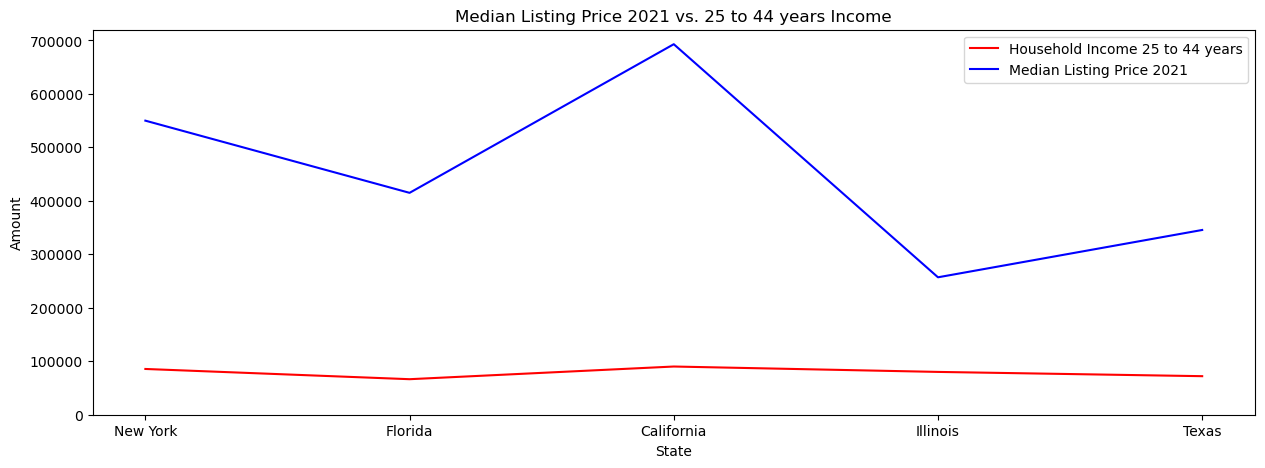

In [37]:
# Plot the difference between house listings and income by age
x_value = selected_housing['State']
selected_housing["Median Listing Price_2021"] = selected_housing["Median Listing Price_2021"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2021']
x_value2 = selected_housing['State']
selected_housing["Household Income 25 to 44 years"] = selected_housing["Household Income 25 to 44 years"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['Household Income 25 to 44 years']
plt.plot(x_value2,y_value2, color="red", label="Household Income 25 to 44 years")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2021")
plt.title("Median Listing Price 2021 vs. 25 to 44 years Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig5.png")
plt.show()

## Median Household Income by Race

### 2019

In [38]:
# Import U.S. Census API Key
from config import census_key

# Create an instance of the Census library
c = Census(
    census_key,
    year = 2019
)

In [39]:
# Run Census Search to retrieve data on all states (2019 ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19013_001E",
        "B19013A_001E",
        "B19013B_001E",
        "B19013C_001E",
        "B19013D_001E",
        "B19013E_001E",
        "B19013F_001E",
        "B19013G_001E",
        "B19013I_001E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
income_race_2019 = pd.DataFrame(census_data)

# Column renaming
income_race_2019 = income_race_2019.rename(
    columns = {
        "B19013_001E": "Household Income Total",
        "B19013A_001E": "White Alone Householder",
        "B19013B_001E": "African American Alone Householder",
        "B19013C_001E": "American Indian and Alaska Native Alone Householder",
        "B19013D_001E": "Asian Alone Householder",
        "B19013E_001E": "Native Hawaiian and Other Pacific Isalnder Alone Householder",
        "B19013F_001E": "Some Other Race Alone Householder",
        "B19013G_001E": "Two or more Races Householder",
        "B19013I_001E": "Hispanic or Latino Householder",
        "NAME": "Name"
    }
)


# Configure the final DataFrame
income_race_2019 = income_race_2019[
    [
        "Name",
        "Household Income Total",
        "White Alone Householder",
        "African American Alone Householder",
        "American Indian and Alaska Native Alone Householder",
        "Asian Alone Householder",
        "Native Hawaiian and Other Pacific Isalnder Alone Householder",
        "Some Other Race Alone Householder",
        "Two or more Races Householder",
        "Hispanic or Latino Householder"
    ]
]

# Rename name to state
income_race_2019 = income_race_2019.rename(columns={"Name":"State"})

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(income_race_2019)}")
income_race_2019

Number of rows in the DataFrame: 52


,State,Household Income Total,White Alone Householder,African American Alone Householder,American Indian and Alaska Native Alone Householder,Asian Alone Householder,Native Hawaiian and Other Pacific Isalnder Alone Householder,Some Other Race Alone Householder,Two or more Races Householder,Hispanic or Latino Householder
0,Alabama,50536.0,57551.0,33928.0,50114.0,63149.0,28377.0,36195.0,44274.0,41584.0
1,Alaska,77640.0,85298.0,62191.0,49959.0,73014.0,66994.0,66880.0,69752.0,69463.0
2,Arizona,58945.0,61172.0,47386.0,37974.0,78785.0,60905.0,46325.0,55685.0,48649.0
3,Arkansas,47597.0,51340.0,32070.0,40625.0,71716.0,46569.0,40276.0,38755.0,42532.0
4,California,75235.0,78308.0,51837.0,55362.0,96962.0,77788.0,55823.0,76116.0,58703.0
5,Colorado,72331.0,74730.0,51677.0,47097.0,80261.0,71173.0,51370.0,66582.0,53929.0
6,Delaware,68287.0,72508.0,50361.0,51891.0,96966.0,55990.0,57363.0,59340.0,55321.0
7,District of Columbia,86420.0,138231.0,45072.0,-666666666.0,106480.0,127917.0,60149.0,93455.0,81227.0
8,Connecticut,78444.0,85502.0,49000.0,43350.0,96689.0,37000.0,41569.0,58464.0,47753.0
9,Florida,55660.0,58809.0,41702.0,48608.0,72205.0,52632.0,46319.0,54597.0,49266.0


In [40]:
# Read in the housing listing prices to compare to income by race
listing_prices = pd.read_csv("output_data/Median Listing Prices.csv")
listing_prices

,Unnamed: 0,State,Year_Month_2019,Median Listing Price_2019,Year_Month_2020,Median Listing Price_2020,Year_Month_2021,Median Listing Price_2021
0,0,Pennsylvania,201912,219400.0,202012,259900.0,202112,250000.0
1,1,Utah,201912,412000.0,202012,531450.0,202112,588225.0
2,2,New York,201912,462450.0,202012,569000.0,202112,549945.0
3,3,Colorado,201912,473014.0,202012,510500.0,202112,549500.0
4,4,West Virginia,201912,161000.0,202012,165000.0,202112,175000.0
5,5,Florida,201912,329995.0,202012,342250.0,202112,414950.0
6,6,Wyoming,201912,266500.0,202012,265000.0,202112,325000.0
7,7,Minnesota,201912,279900.0,202012,299650.0,202112,320000.0
8,8,Kansas,201912,179950.0,202012,195125.0,202112,212500.0
9,9,Virginia,201912,316225.0,202012,344995.0,202112,366975.0


In [41]:
# Run Census Search to retrieve data on all states (2019 ACS5 Census)
income_race = pd.merge(income_race_2019, listing_prices, on=('State'), how='right')

income_race = income_race[["State",
                         "Year_Month_2019",
                         "Median Listing Price_2019",
                         "Household Income Total",
                         "White Alone Householder",
                         "African American Alone Householder",
                         "American Indian and Alaska Native Alone Householder",
                         "Asian Alone Householder",
                         "Native Hawaiian and Other Pacific Isalnder Alone Householder",
                         "Some Other Race Alone Householder",
                         "Two or more Races Householder",
                         "Hispanic or Latino Householder"
                        ]]

income_race["Median Listing Price_2019"] = income_race["Median Listing Price_2019"].map("${:,.2f}".format)
income_race["Household Income Total"] = income_race["Household Income Total"].map("${:,.2f}".format)
income_race["White Alone Householder"] = income_race["White Alone Householder"].map("${:,.2f}".format)
income_race["African American Alone Householder"] = income_race["African American Alone Householder"].map("${:,.2f}".format)
income_race["American Indian and Alaska Native Alone Householder"] = income_race["American Indian and Alaska Native Alone Householder"].map("${:,.2f}".format)
income_race["Asian Alone Householder"] = income_race["Asian Alone Householder"].map("${:,.2f}".format)
income_race["Native Hawaiian and Other Pacific Isalnder Alone Householder"] = income_race["Native Hawaiian and Other Pacific Isalnder Alone Householder"].map("${:,.2f}".format)
income_race["Some Other Race Alone Householder"] = income_race["Some Other Race Alone Householder"].map("${:,.2f}".format)
income_race["Two or more Races Householder"] = income_race["Two or more Races Householder"].map("${:,.2f}".format)
income_race["Hispanic or Latino Householder"] = income_race["Hispanic or Latino Householder"].map("${:,.2f}".format)

income_race

,State,Year_Month_2019,Median Listing Price_2019,Household Income Total,White Alone Householder,African American Alone Householder,American Indian and Alaska Native Alone Householder,Asian Alone Householder,Native Hawaiian and Other Pacific Isalnder Alone Householder,Some Other Race Alone Householder,Two or more Races Householder,Hispanic or Latino Householder
0,Pennsylvania,201912,"$219,400.00","$61,744.00","$65,306.00","$38,560.00","$40,622.00","$76,682.00","$47,237.00","$36,566.00","$48,713.00","$41,725.00"
1,Utah,201912,"$412,000.00","$71,621.00","$73,580.00","$41,752.00","$45,957.00","$73,139.00","$66,391.00","$51,365.00","$61,957.00","$53,547.00"
2,New York,201912,"$462,450.00","$68,486.00","$76,737.00","$48,557.00","$41,509.00","$76,341.00","$54,593.00","$42,907.00","$60,767.00","$49,159.00"
3,Colorado,201912,"$473,014.00","$72,331.00","$74,730.00","$51,677.00","$47,097.00","$80,261.00","$71,173.00","$51,370.00","$66,582.00","$53,929.00"
4,West Virginia,201912,"$161,000.00","$46,711.00","$47,143.00","$33,133.00","$30,406.00","$64,567.00","$-666,666,666.00","$43,554.00","$43,148.00","$48,729.00"
5,Florida,201912,"$329,995.00","$55,660.00","$58,809.00","$41,702.00","$48,608.00","$72,205.00","$52,632.00","$46,319.00","$54,597.00","$49,266.00"
6,Wyoming,201912,"$266,500.00","$64,049.00","$64,820.00","$47,386.00","$51,277.00","$54,516.00","$-666,666,666.00","$48,640.00","$54,405.00","$52,717.00"
7,Minnesota,201912,"$279,900.00","$71,306.00","$74,387.00","$37,811.00","$37,973.00","$79,482.00","$49,330.00","$49,138.00","$57,670.00","$51,426.00"
8,Kansas,201912,"$179,950.00","$59,597.00","$61,812.00","$38,079.00","$41,691.00","$70,987.00","$60,323.00","$46,581.00","$48,392.00","$47,203.00"
9,Virginia,201912,"$316,225.00","$74,222.00","$79,578.00","$51,654.00","$62,186.00","$105,931.00","$78,021.00","$59,123.00","$73,026.00","$68,772.00"


In [42]:
# Select certain states to pull data from
selected_states = ["California", "Texas", "New York", "Florida", "Illinois"]
selected_housing = income_race[income_race["State"].isin(selected_states)]
selected_housing

,State,Year_Month_2019,Median Listing Price_2019,Household Income Total,White Alone Householder,African American Alone Householder,American Indian and Alaska Native Alone Householder,Asian Alone Householder,Native Hawaiian and Other Pacific Isalnder Alone Householder,Some Other Race Alone Householder,Two or more Races Householder,Hispanic or Latino Householder
2,New York,201912,"$462,450.00","$68,486.00","$76,737.00","$48,557.00","$41,509.00","$76,341.00","$54,593.00","$42,907.00","$60,767.00","$49,159.00"
5,Florida,201912,"$329,995.00","$55,660.00","$58,809.00","$41,702.00","$48,608.00","$72,205.00","$52,632.00","$46,319.00","$54,597.00","$49,266.00"
12,California,201912,"$551,728.00","$75,235.00","$78,308.00","$51,837.00","$55,362.00","$96,962.00","$77,788.00","$55,823.00","$76,116.00","$58,703.00"
20,Illinois,201912,"$231,450.00","$65,886.00","$71,922.00","$38,573.00","$49,634.00","$90,278.00","$46,023.00","$52,832.00","$59,451.00","$55,836.00"
34,Texas,201912,"$285,000.00","$61,874.00","$64,810.00","$46,572.00","$56,394.00","$88,486.00","$55,136.00","$45,681.00","$60,327.00","$49,260.00"


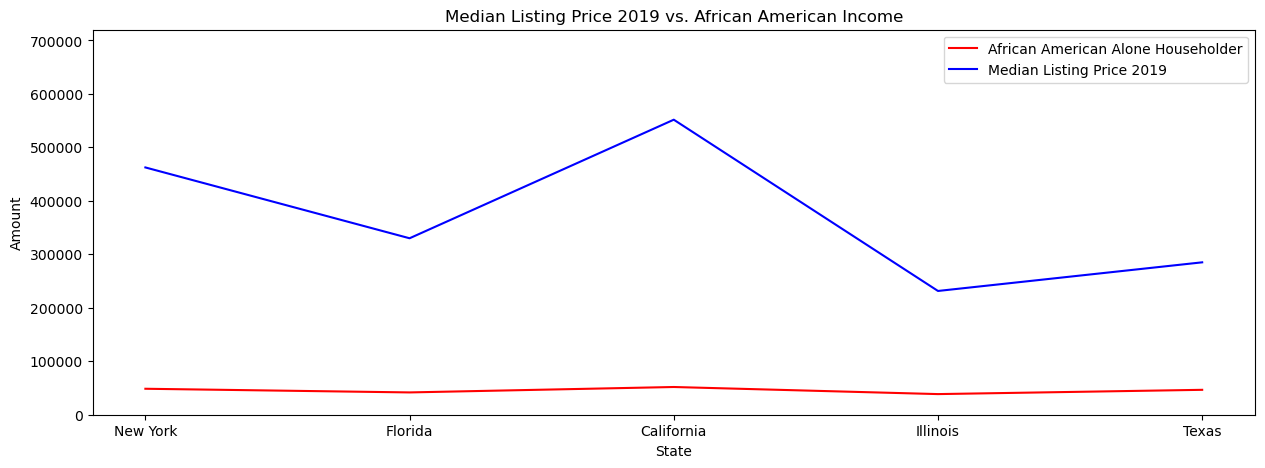

In [43]:
# Plot the difference between house listings and income by race
x_value = selected_housing['State']
selected_housing["Median Listing Price_2019"] = selected_housing["Median Listing Price_2019"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2019']
x_value2 = selected_housing['State']
selected_housing["African American Alone Householder"] = selected_housing["African American Alone Householder"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['African American Alone Householder']
plt.plot(x_value2,y_value2, color="red", label="African American Alone Householder")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2019")
plt.xlabel("State")
plt.ylabel("Amount")
plt.title("Median Listing Price 2019 vs. African American Income")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig6.png")
plt.show()

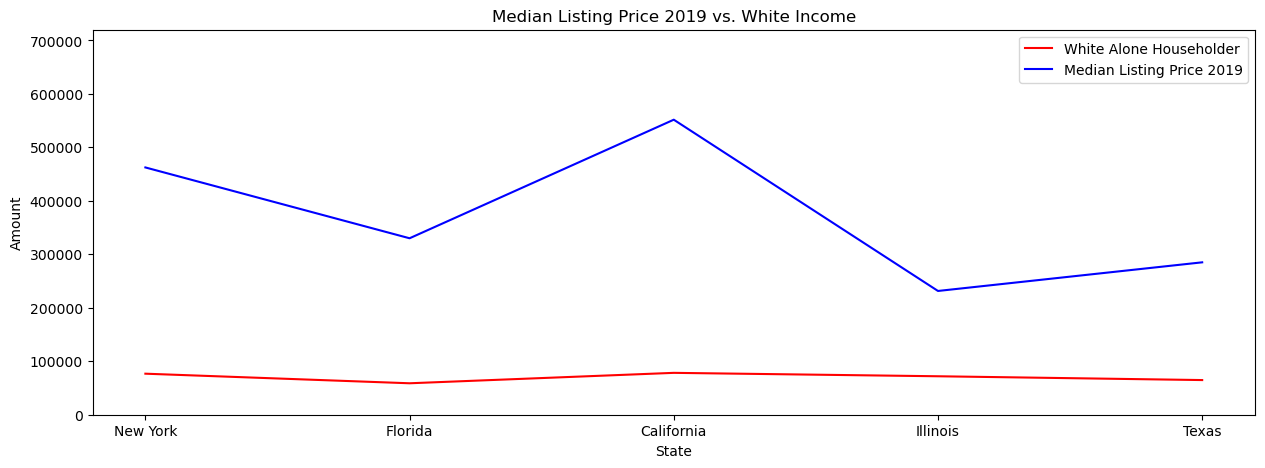

In [44]:
# Plot the difference between house listings and income by race
x_value = selected_housing['State']
selected_housing["Median Listing Price_2019"] = selected_housing["Median Listing Price_2019"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2019']
x_value2 = selected_housing['State']
selected_housing["White Alone Householder"] = selected_housing["White Alone Householder"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['White Alone Householder']
plt.plot(x_value2,y_value2, color="red", label="White Alone Householder")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2019")
plt.title("Median Listing Price 2019 vs. White Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig6.png")
plt.show()

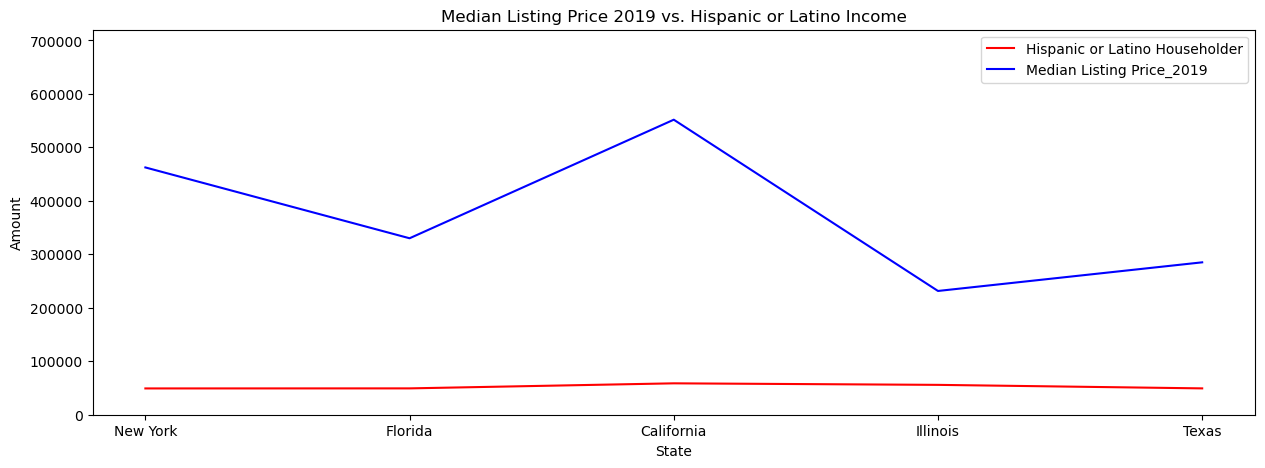

In [45]:
# Plot the difference between house listings and income by race
x_value = selected_housing['State']
selected_housing["Median Listing Price_2019"] = selected_housing["Median Listing Price_2019"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2019']
x_value2 = selected_housing['State']
selected_housing["Hispanic or Latino Householder"] = selected_housing["Hispanic or Latino Householder"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['Hispanic or Latino Householder']
plt.plot(x_value2,y_value2, color="red", label="Hispanic or Latino Householder")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price_2019")
plt.title("Median Listing Price 2019 vs. Hispanic or Latino Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig9.png")
plt.show()

### 2020

In [46]:
# Import U.S. Census API Key
from config import census_key

# Create an instance of the Census library
c = Census(
    census_key,
    year = 2020
)

In [47]:
# Run Census Search to retrieve data on all states (2020 ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19013_001E",
        "B19013A_001E",
        "B19013B_001E",
        "B19013C_001E",
        "B19013D_001E",
        "B19013E_001E",
        "B19013F_001E",
        "B19013G_001E",
        "B19013I_001E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
income_race_2020 = pd.DataFrame(census_data)

# Column renaming
income_race_2020 = income_race_2020.rename(
    columns = {
        "B19013_001E": "Household Income Total",
        "B19013A_001E": "White Alone Householder",
        "B19013B_001E": "African American Alone Householder",
        "B19013C_001E": "American Indian and Alaska Native Alone Householder",
        "B19013D_001E": "Asian Alone Householder",
        "B19013E_001E": "Native Hawaiian and Other Pacific Isalnder Alone Householder",
        "B19013F_001E": "Some Other Race Alone Householder",
        "B19013G_001E": "Two or more Races Householder",
        "B19013I_001E": "Hispanic or Latino Householder",
        "NAME": "Name"
    }
)


# Configure the final DataFrame
income_race_2020 = income_race_2020[
    [
        "Name",
        "Household Income Total",
        "White Alone Householder",
        "African American Alone Householder",
        "American Indian and Alaska Native Alone Householder",
        "Asian Alone Householder",
        "Native Hawaiian and Other Pacific Isalnder Alone Householder",
        "Some Other Race Alone Householder",
        "Two or more Races Householder",
        "Hispanic or Latino Householder"
    ]
]

# Rename name to state
income_race_2020 = income_race_2020.rename(columns={"Name":"State"})

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(income_race_2020)}")
income_race_2020

Number of rows in the DataFrame: 52


,State,Household Income Total,White Alone Householder,African American Alone Householder,American Indian and Alaska Native Alone Householder,Asian Alone Householder,Native Hawaiian and Other Pacific Isalnder Alone Householder,Some Other Race Alone Householder,Two or more Races Householder,Hispanic or Latino Householder
0,Pennsylvania,63627.0,67270.0,40370.0,41937.0,80088.0,53609.0,40023.0,57857.0,45590.0
1,California,78672.0,82157.0,54976.0,60182.0,101380.0,81682.0,59287.0,76733.0,62330.0
2,West Virginia,48037.0,48670.0,32803.0,22557.0,55372.0,-666666666.0,44297.0,42143.0,53829.0
3,Utah,74197.0,76024.0,44772.0,49403.0,75343.0,66637.0,54362.0,70447.0,57417.0
4,New York,71117.0,79252.0,51060.0,44268.0,78925.0,46887.0,46500.0,64279.0,52643.0
5,District of Columbia,90842.0,144769.0,48515.0,53244.0,107732.0,130104.0,61145.0,96305.0,80502.0
6,Alaska,77790.0,85644.0,64054.0,49963.0,73873.0,66026.0,73172.0,72478.0,67559.0
7,Florida,57703.0,61065.0,43418.0,49775.0,73412.0,55856.0,48038.0,57003.0,52092.0
8,South Carolina,54864.0,63490.0,36271.0,42052.0,74108.0,64306.0,41369.0,53626.0,45778.0
9,North Dakota,65315.0,68419.0,39280.0,38129.0,55179.0,29141.0,45902.0,56133.0,46367.0


In [48]:
# Read in the housing listing prices to compare to income by race
listing_prices = pd.read_csv("output_data/Median Listing Prices.csv")
listing_prices

,Unnamed: 0,State,Year_Month_2019,Median Listing Price_2019,Year_Month_2020,Median Listing Price_2020,Year_Month_2021,Median Listing Price_2021
0,0,Pennsylvania,201912,219400.0,202012,259900.0,202112,250000.0
1,1,Utah,201912,412000.0,202012,531450.0,202112,588225.0
2,2,New York,201912,462450.0,202012,569000.0,202112,549945.0
3,3,Colorado,201912,473014.0,202012,510500.0,202112,549500.0
4,4,West Virginia,201912,161000.0,202012,165000.0,202112,175000.0
5,5,Florida,201912,329995.0,202012,342250.0,202112,414950.0
6,6,Wyoming,201912,266500.0,202012,265000.0,202112,325000.0
7,7,Minnesota,201912,279900.0,202012,299650.0,202112,320000.0
8,8,Kansas,201912,179950.0,202012,195125.0,202112,212500.0
9,9,Virginia,201912,316225.0,202012,344995.0,202112,366975.0


In [49]:
# Run Census Search to retrieve data on all states (2020 ACS5 Census)
income_race = pd.merge(income_race_2020, listing_prices, on=('State'), how='right')

income_race = income_race[["State",
                         "Year_Month_2020",
                         "Median Listing Price_2020",
                         "Household Income Total",
                         "White Alone Householder",
                         "African American Alone Householder",
                         "American Indian and Alaska Native Alone Householder",
                         "Asian Alone Householder",
                         "Native Hawaiian and Other Pacific Isalnder Alone Householder",
                         "Some Other Race Alone Householder",
                         "Two or more Races Householder",
                         "Hispanic or Latino Householder"
                        ]]

income_race["Median Listing Price_2020"] = income_race["Median Listing Price_2020"].map("${:,.2f}".format)
income_race["Household Income Total"] = income_race["Household Income Total"].map("${:,.2f}".format)
income_race["White Alone Householder"] = income_race["White Alone Householder"].map("${:,.2f}".format)
income_race["African American Alone Householder"] = income_race["African American Alone Householder"].map("${:,.2f}".format)
income_race["American Indian and Alaska Native Alone Householder"] = income_race["American Indian and Alaska Native Alone Householder"].map("${:,.2f}".format)
income_race["Asian Alone Householder"] = income_race["Asian Alone Householder"].map("${:,.2f}".format)
income_race["Native Hawaiian and Other Pacific Isalnder Alone Householder"] = income_race["Native Hawaiian and Other Pacific Isalnder Alone Householder"].map("${:,.2f}".format)
income_race["Some Other Race Alone Householder"] = income_race["Some Other Race Alone Householder"].map("${:,.2f}".format)
income_race["Two or more Races Householder"] = income_race["Two or more Races Householder"].map("${:,.2f}".format)
income_race["Hispanic or Latino Householder"] = income_race["Hispanic or Latino Householder"].map("${:,.2f}".format)

income_race

,State,Year_Month_2020,Median Listing Price_2020,Household Income Total,White Alone Householder,African American Alone Householder,American Indian and Alaska Native Alone Householder,Asian Alone Householder,Native Hawaiian and Other Pacific Isalnder Alone Householder,Some Other Race Alone Householder,Two or more Races Householder,Hispanic or Latino Householder
0,Pennsylvania,202012,"$259,900.00","$63,627.00","$67,270.00","$40,370.00","$41,937.00","$80,088.00","$53,609.00","$40,023.00","$57,857.00","$45,590.00"
1,Utah,202012,"$531,450.00","$74,197.00","$76,024.00","$44,772.00","$49,403.00","$75,343.00","$66,637.00","$54,362.00","$70,447.00","$57,417.00"
2,New York,202012,"$569,000.00","$71,117.00","$79,252.00","$51,060.00","$44,268.00","$78,925.00","$46,887.00","$46,500.00","$64,279.00","$52,643.00"
3,Colorado,202012,"$510,500.00","$75,231.00","$77,462.00","$53,806.00","$52,028.00","$83,168.00","$71,294.00","$55,011.00","$66,395.00","$57,790.00"
4,West Virginia,202012,"$165,000.00","$48,037.00","$48,670.00","$32,803.00","$22,557.00","$55,372.00","$-666,666,666.00","$44,297.00","$42,143.00","$53,829.00"
5,Florida,202012,"$342,250.00","$57,703.00","$61,065.00","$43,418.00","$49,775.00","$73,412.00","$55,856.00","$48,038.00","$57,003.00","$52,092.00"
6,Wyoming,202012,"$265,000.00","$65,304.00","$66,028.00","$53,354.00","$50,458.00","$69,917.00","$45,625.00","$59,587.00","$61,115.00","$56,981.00"
7,Minnesota,202012,"$299,650.00","$73,382.00","$76,380.00","$40,785.00","$37,795.00","$82,473.00","$55,938.00","$54,934.00","$61,836.00","$57,081.00"
8,Kansas,202012,"$195,125.00","$61,091.00","$63,379.00","$39,274.00","$43,540.00","$70,355.00","$46,269.00","$48,693.00","$50,953.00","$49,196.00"
9,Virginia,202012,"$344,995.00","$76,398.00","$81,840.00","$52,929.00","$67,730.00","$108,033.00","$74,432.00","$63,132.00","$78,872.00","$70,786.00"


In [50]:
# Select certain states to pull data from
selected_states = ["California", "Texas", "New York", "Florida", "Illinois"]
selected_housing = income_race[income_race["State"].isin(selected_states)]
selected_housing

,State,Year_Month_2020,Median Listing Price_2020,Household Income Total,White Alone Householder,African American Alone Householder,American Indian and Alaska Native Alone Householder,Asian Alone Householder,Native Hawaiian and Other Pacific Isalnder Alone Householder,Some Other Race Alone Householder,Two or more Races Householder,Hispanic or Latino Householder
2,New York,202012,"$569,000.00","$71,117.00","$79,252.00","$51,060.00","$44,268.00","$78,925.00","$46,887.00","$46,500.00","$64,279.00","$52,643.00"
5,Florida,202012,"$342,250.00","$57,703.00","$61,065.00","$43,418.00","$49,775.00","$73,412.00","$55,856.00","$48,038.00","$57,003.00","$52,092.00"
12,California,202012,"$704,450.00","$78,672.00","$82,157.00","$54,976.00","$60,182.00","$101,380.00","$81,682.00","$59,287.00","$76,733.00","$62,330.00"
20,Illinois,202012,"$259,450.00","$68,428.00","$74,204.00","$41,021.00","$55,222.00","$94,386.00","$60,096.00","$55,887.00","$62,567.00","$59,699.00"
34,Texas,202012,"$299,900.00","$63,826.00","$67,695.00","$48,293.00","$57,973.00","$91,879.00","$58,796.00","$48,208.00","$58,688.00","$51,401.00"


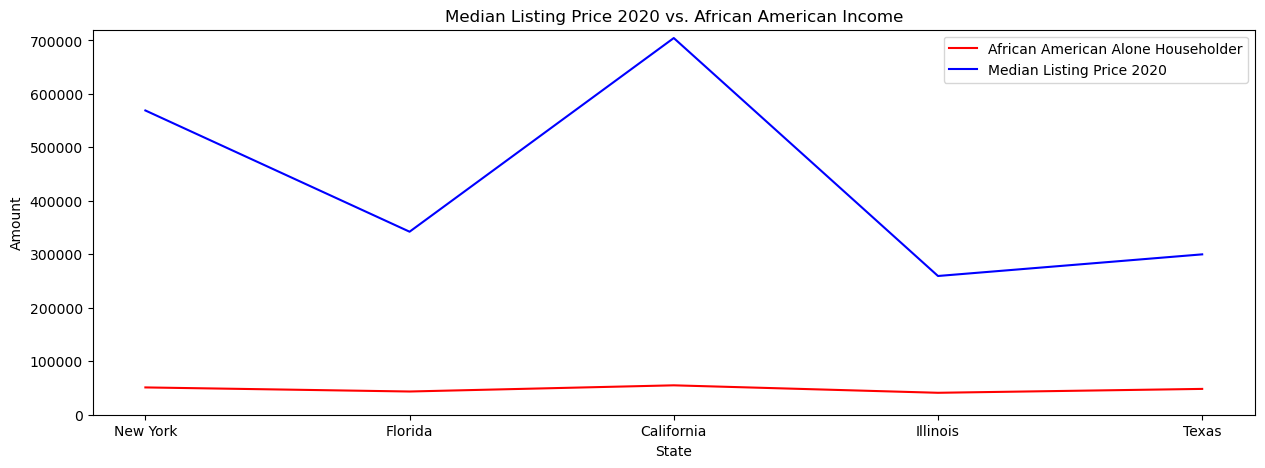

In [51]:
# Plot the difference between house listings and income by race
x_value = selected_housing['State']
selected_housing["Median Listing Price_2020"] = selected_housing["Median Listing Price_2020"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2020']
x_value2 = selected_housing['State']
selected_housing["African American Alone Householder"] = selected_housing["African American Alone Householder"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['African American Alone Householder']
plt.plot(x_value2,y_value2, color="red", label="African American Alone Householder")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2020")
plt.title("Median Listing Price 2020 vs. African American Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig7.png")
plt.show()

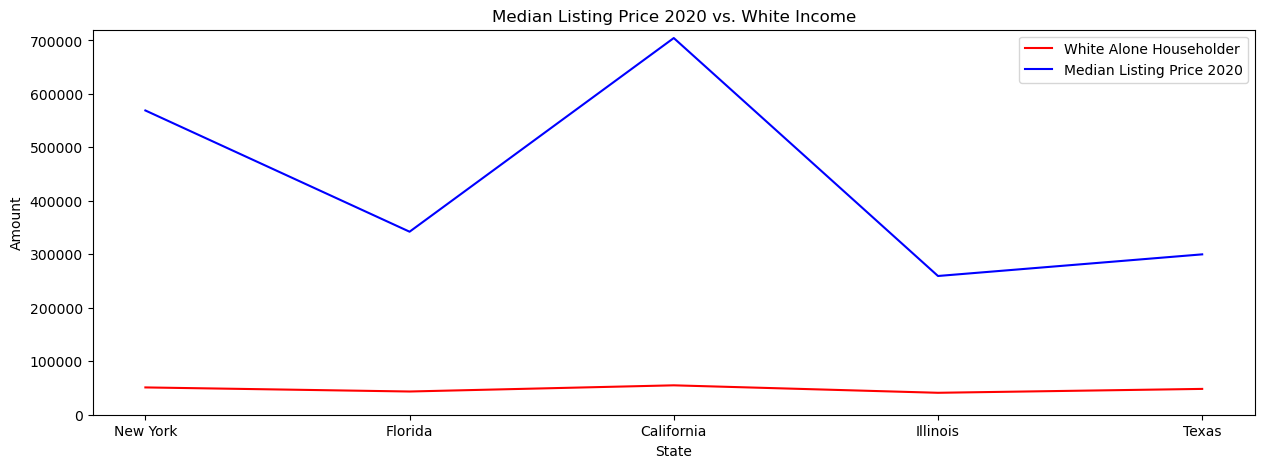

In [52]:
# Plot the difference between house listings and income by race
x_value = selected_housing['State']
selected_housing["Median Listing Price_2020"] = selected_housing["Median Listing Price_2020"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2020']
x_value2 = selected_housing['State']
selected_housing["White Alone Householder"] = selected_housing["White Alone Householder"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['African American Alone Householder']
plt.plot(x_value2,y_value2, color="red", label="White Alone Householder")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2020")
plt.title("Median Listing Price 2020 vs. White Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig8.png")
plt.show()

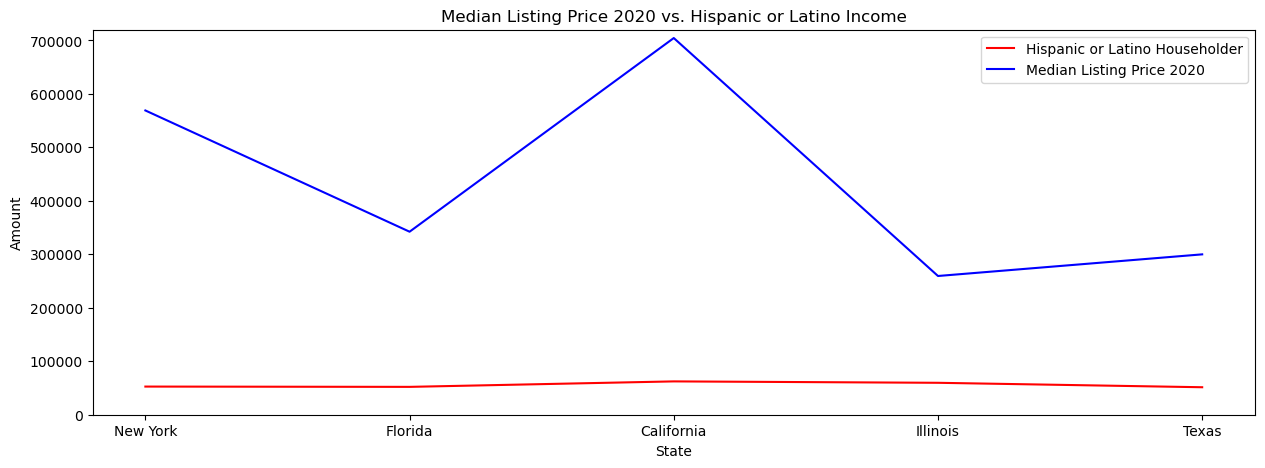

In [53]:
# Plot the difference between house listings and income by race
x_value = selected_housing['State']
selected_housing["Median Listing Price_2020"] = selected_housing["Median Listing Price_2020"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2020']
x_value2 = selected_housing['State']
selected_housing["Hispanic or Latino Householder"] = selected_housing["Hispanic or Latino Householder"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['Hispanic or Latino Householder']
plt.plot(x_value2,y_value2, color="red", label="Hispanic or Latino Householder")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2020")
plt.title("Median Listing Price 2020 vs. Hispanic or Latino Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig10.png")
plt.show()

### 2021

In [54]:
# Import U.S. Census API Key
from config import census_key

# Create an instance of the Census library
c = Census(
    census_key,
    year = 2021
)

In [55]:
# Run Census Search to retrieve data on all states (2021 ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19013_001E",
        "B19013A_001E",
        "B19013B_001E",
        "B19013C_001E",
        "B19013D_001E",
        "B19013E_001E",
        "B19013F_001E",
        "B19013G_001E",
        "B19013I_001E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
income_race_2021 = pd.DataFrame(census_data)

# Column renaming
income_race_2021 = income_race_2021.rename(
    columns = {
        "B19013_001E": "Household Income Total",
        "B19013A_001E": "White Alone Householder",
        "B19013B_001E": "African American Alone Householder",
        "B19013C_001E": "American Indian and Alaska Native Alone Householder",
        "B19013D_001E": "Asian Alone Householder",
        "B19013E_001E": "Native Hawaiian and Other Pacific Isalnder Alone Householder",
        "B19013F_001E": "Some Other Race Alone Householder",
        "B19013G_001E": "Two or more Races Householder",
        "B19013I_001E": "Hispanic or Latino Householder",
        "NAME": "Name"
    }
)


# Configure the final DataFrame
income_race_2021 = income_race_2021[
    [
        "Name",
        "Household Income Total",
        "White Alone Householder",
        "African American Alone Householder",
        "American Indian and Alaska Native Alone Householder",
        "Asian Alone Householder",
        "Native Hawaiian and Other Pacific Isalnder Alone Householder",
        "Some Other Race Alone Householder",
        "Two or more Races Householder",
        "Hispanic or Latino Householder"
    ]
]

# Rename name to state
income_race_2021 = income_race_2021.rename(columns={"Name":"State"})

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(income_race_2021)}")
income_race_2021

Number of rows in the DataFrame: 52


,State,Household Income Total,White Alone Householder,African American Alone Householder,American Indian and Alaska Native Alone Householder,Asian Alone Householder,Native Hawaiian and Other Pacific Isalnder Alone Householder,Some Other Race Alone Householder,Two or more Races Householder,Hispanic or Latino Householder
0,Alabama,54943.0,63592.0,37215.0,52999.0,73277.0,55787.0,40080.0,50752.0,45455.0
1,Alaska,80287.0,87920.0,66769.0,53061.0,76478.0,69557.0,66921.0,77814.0,66153.0
2,Arizona,65913.0,68643.0,53303.0,41983.0,87976.0,78141.0,55001.0,62058.0,56433.0
3,Arkansas,52123.0,55985.0,35200.0,43386.0,77983.0,50977.0,46756.0,49652.0,49307.0
4,California,84097.0,88616.0,58958.0,66904.0,108477.0,87066.0,63975.0,79777.0,67327.0
5,Colorado,80184.0,83303.0,57118.0,55122.0,91537.0,76717.0,60126.0,69851.0,62615.0
6,Connecticut,83572.0,91524.0,54325.0,43750.0,108485.0,25534.0,44836.0,66899.0,50912.0
7,Delaware,72724.0,78491.0,53636.0,51661.0,108456.0,93516.0,59505.0,63494.0,58911.0
8,District of Columbia,93547.0,150563.0,51562.0,58164.0,112776.0,132054.0,65202.0,96003.0,89480.0
9,Florida,61777.0,65519.0,46176.0,53839.0,78346.0,58150.0,51608.0,61073.0,56091.0


In [56]:
# Read in the housing listing prices to compare to income by race
listing_prices = pd.read_csv("output_data/Median Listing Prices.csv")
listing_prices

,Unnamed: 0,State,Year_Month_2019,Median Listing Price_2019,Year_Month_2020,Median Listing Price_2020,Year_Month_2021,Median Listing Price_2021
0,0,Pennsylvania,201912,219400.0,202012,259900.0,202112,250000.0
1,1,Utah,201912,412000.0,202012,531450.0,202112,588225.0
2,2,New York,201912,462450.0,202012,569000.0,202112,549945.0
3,3,Colorado,201912,473014.0,202012,510500.0,202112,549500.0
4,4,West Virginia,201912,161000.0,202012,165000.0,202112,175000.0
5,5,Florida,201912,329995.0,202012,342250.0,202112,414950.0
6,6,Wyoming,201912,266500.0,202012,265000.0,202112,325000.0
7,7,Minnesota,201912,279900.0,202012,299650.0,202112,320000.0
8,8,Kansas,201912,179950.0,202012,195125.0,202112,212500.0
9,9,Virginia,201912,316225.0,202012,344995.0,202112,366975.0


In [57]:
# Run Census Search to retrieve data on all states (2021 ACS5 Census)
income_race = pd.merge(income_race_2021, listing_prices, on=('State'), how='right')

income_race = income_race[["State",
                         "Year_Month_2021",
                         "Median Listing Price_2021",
                         "Household Income Total",
                         "White Alone Householder",
                         "African American Alone Householder",
                         "American Indian and Alaska Native Alone Householder",
                         "Asian Alone Householder",
                         "Native Hawaiian and Other Pacific Isalnder Alone Householder",
                         "Some Other Race Alone Householder",
                         "Two or more Races Householder",
                         "Hispanic or Latino Householder"
                        ]]

income_race["Median Listing Price_2021"] = income_race["Median Listing Price_2021"].map("${:,.2f}".format)
income_race["Household Income Total"] = income_race["Household Income Total"].map("${:,.2f}".format)
income_race["White Alone Householder"] = income_race["White Alone Householder"].map("${:,.2f}".format)
income_race["African American Alone Householder"] = income_race["African American Alone Householder"].map("${:,.2f}".format)
income_race["American Indian and Alaska Native Alone Householder"] = income_race["American Indian and Alaska Native Alone Householder"].map("${:,.2f}".format)
income_race["Asian Alone Householder"] = income_race["Asian Alone Householder"].map("${:,.2f}".format)
income_race["Native Hawaiian and Other Pacific Isalnder Alone Householder"] = income_race["Native Hawaiian and Other Pacific Isalnder Alone Householder"].map("${:,.2f}".format)
income_race["Some Other Race Alone Householder"] = income_race["Some Other Race Alone Householder"].map("${:,.2f}".format)
income_race["Two or more Races Householder"] = income_race["Two or more Races Householder"].map("${:,.2f}".format)
income_race["Hispanic or Latino Householder"] = income_race["Hispanic or Latino Householder"].map("${:,.2f}".format)

income_race

,State,Year_Month_2021,Median Listing Price_2021,Household Income Total,White Alone Householder,African American Alone Householder,American Indian and Alaska Native Alone Householder,Asian Alone Householder,Native Hawaiian and Other Pacific Isalnder Alone Householder,Some Other Race Alone Householder,Two or more Races Householder,Hispanic or Latino Householder
0,Pennsylvania,202112,"$250,000.00","$67,587.00","$71,844.00","$42,431.00","$48,456.00","$85,332.00","$39,252.00","$41,254.00","$62,303.00","$49,305.00"
1,Utah,202112,"$588,225.00","$79,133.00","$81,350.00","$48,343.00","$54,545.00","$79,263.00","$68,819.00","$60,409.00","$73,796.00","$62,714.00"
2,New York,202112,"$549,945.00","$75,157.00","$83,877.00","$53,697.00","$50,731.00","$83,399.00","$49,528.00","$49,838.00","$68,158.00","$55,621.00"
3,Colorado,202112,"$549,500.00","$80,184.00","$83,303.00","$57,118.00","$55,122.00","$91,537.00","$76,717.00","$60,126.00","$69,851.00","$62,615.00"
4,West Virginia,202112,"$175,000.00","$50,884.00","$51,585.00","$34,163.00","$38,451.00","$60,506.00","$-666,666,666.00","$46,158.00","$43,444.00","$52,922.00"
5,Florida,202112,"$414,950.00","$61,777.00","$65,519.00","$46,176.00","$53,839.00","$78,346.00","$58,150.00","$51,608.00","$61,073.00","$56,091.00"
6,Wyoming,202112,"$325,000.00","$68,002.00","$68,965.00","$43,621.00","$54,363.00","$54,550.00","$57,778.00","$63,246.00","$62,661.00","$58,316.00"
7,Minnesota,202112,"$320,000.00","$77,706.00","$80,991.00","$44,484.00","$40,982.00","$89,030.00","$39,576.00","$57,896.00","$66,073.00","$62,527.00"
8,Kansas,202112,"$212,500.00","$64,521.00","$66,892.00","$42,057.00","$46,184.00","$77,166.00","$58,505.00","$50,990.00","$53,728.00","$52,392.00"
9,Virginia,202112,"$366,975.00","$80,615.00","$86,797.00","$55,413.00","$73,982.00","$114,995.00","$81,928.00","$65,863.00","$83,526.00","$76,127.00"


In [58]:
# Select certain states to pull data from
selected_states = ["California", "Texas", "New York", "Florida", "Illinois"]
selected_housing = income_race[income_race["State"].isin(selected_states)]
selected_housing

,State,Year_Month_2021,Median Listing Price_2021,Household Income Total,White Alone Householder,African American Alone Householder,American Indian and Alaska Native Alone Householder,Asian Alone Householder,Native Hawaiian and Other Pacific Isalnder Alone Householder,Some Other Race Alone Householder,Two or more Races Householder,Hispanic or Latino Householder
2,New York,202112,"$549,945.00","$75,157.00","$83,877.00","$53,697.00","$50,731.00","$83,399.00","$49,528.00","$49,838.00","$68,158.00","$55,621.00"
5,Florida,202112,"$414,950.00","$61,777.00","$65,519.00","$46,176.00","$53,839.00","$78,346.00","$58,150.00","$51,608.00","$61,073.00","$56,091.00"
12,California,202112,"$692,928.00","$84,097.00","$88,616.00","$58,958.00","$66,904.00","$108,477.00","$87,066.00","$63,975.00","$79,777.00","$67,327.00"
20,Illinois,202112,"$257,000.00","$72,563.00","$78,666.00","$43,183.00","$62,492.00","$97,956.00","$64,836.00","$61,262.00","$67,907.00","$63,833.00"
34,Texas,202112,"$345,500.00","$67,321.00","$72,829.00","$50,916.00","$62,393.00","$96,961.00","$63,991.00","$50,990.00","$60,120.00","$54,786.00"


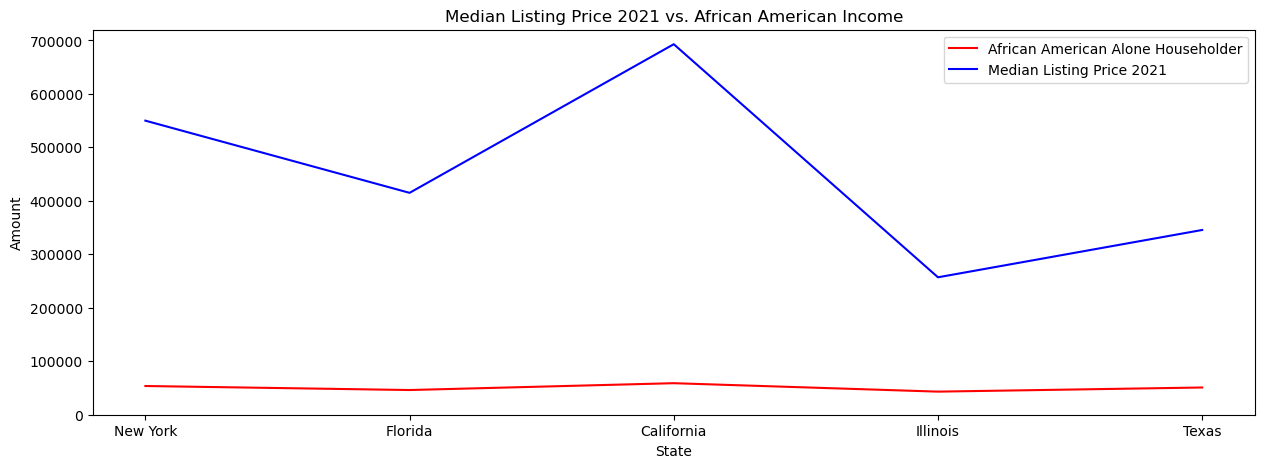

In [59]:
# Plot the difference between house listings and income by race
x_value = selected_housing['State']
selected_housing["Median Listing Price_2021"] = selected_housing["Median Listing Price_2021"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2021']
x_value2 = selected_housing['State']
selected_housing["African American Alone Householder"] = selected_housing["African American Alone Householder"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['African American Alone Householder']
plt.plot(x_value2,y_value2, color="red", label="African American Alone Householder")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2021")
plt.title("Median Listing Price 2021 vs. African American Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig8.png")
plt.show()

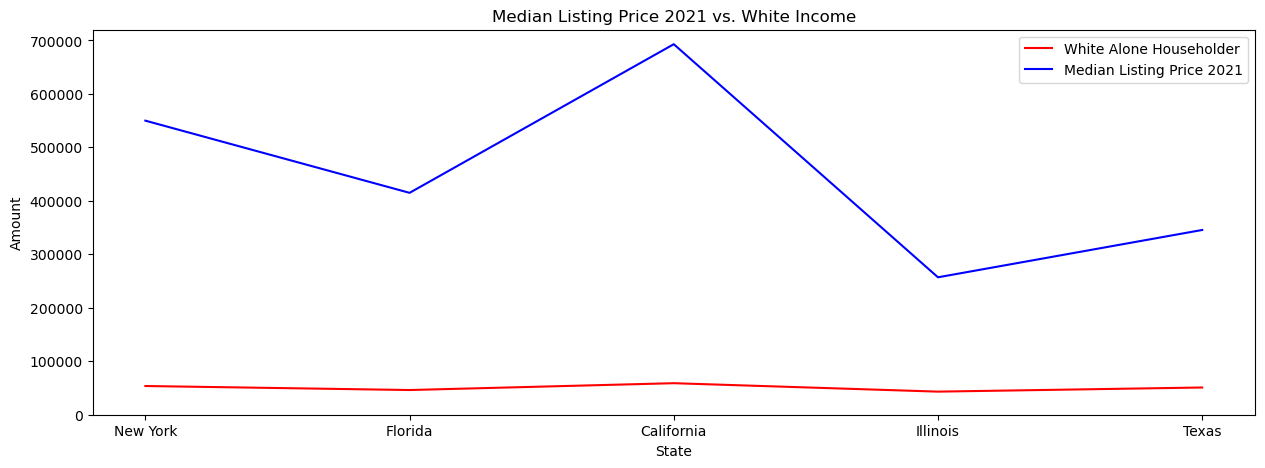

In [60]:
# Plot the difference between house listings and income by race
x_value = selected_housing['State']
selected_housing["Median Listing Price_2021"] = selected_housing["Median Listing Price_2021"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2021']
x_value2 = selected_housing['State']
selected_housing["White Alone Householder"] = selected_housing["White Alone Householder"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['African American Alone Householder']
plt.plot(x_value2,y_value2, color="red", label="White Alone Householder")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2021")
plt.title("Median Listing Price 2021 vs. White Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig8.png")
plt.show()

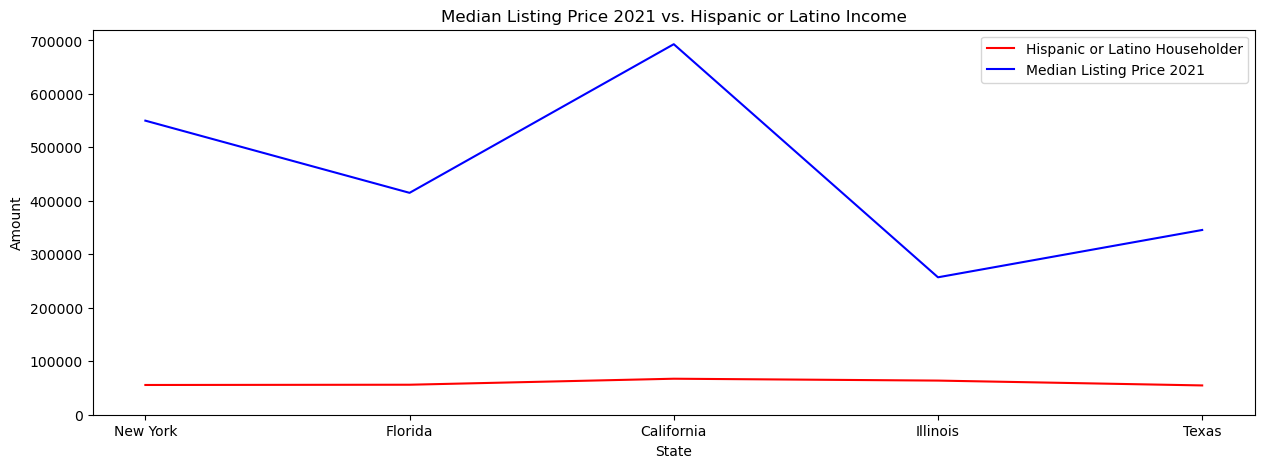

In [61]:
# Plot the difference between house listings and income by race
x_value = selected_housing['State']
selected_housing["Median Listing Price_2021"] = selected_housing["Median Listing Price_2021"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2021']
x_value2 = selected_housing['State']
selected_housing["Hispanic or Latino Householder"] = selected_housing["Hispanic or Latino Householder"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['Hispanic or Latino Householder']
plt.plot(x_value2,y_value2, color="red", label="Hispanic or Latino Householder")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2021")
plt.title("Median Listing Price 2021 vs. Hispanic or Latino Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig11.png")
plt.show()